In [7]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target variable
features = df.select_dtypes(include=[float, int]).drop(columns=['IMDb Score'])
# features = df[['Is Series', 'Hidden Gem Score', 'Runtime', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes', 'Minimum Age']]
target = df['IMDb Score']

# Drop rows with missing values in features or target
features = features.dropna()
target = target[features.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2547032777136155
R-squared: 0.7048986571853153


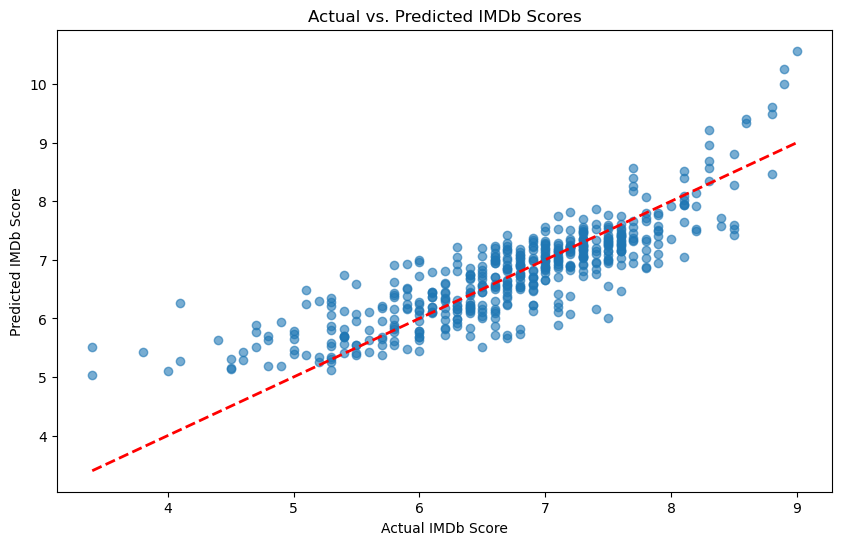

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs. Predicted IMDb Scores')
plt.show()


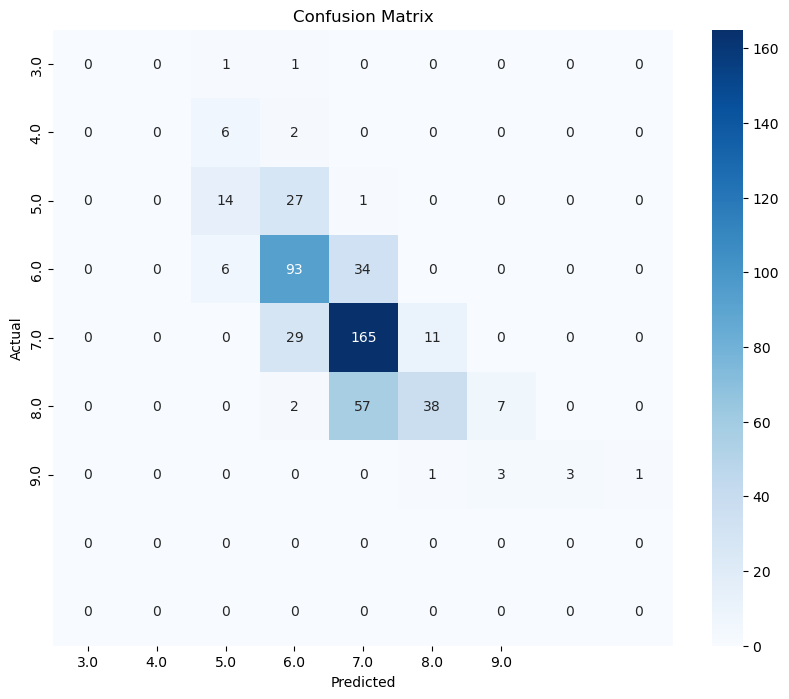

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Round the predicted and actual IMDb scores to the nearest integer
y_pred_rounded = np.round(y_pred)
y_test_rounded = np.round(y_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_rounded, y_pred_rounded)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_rounded), yticklabels=np.unique(y_test_rounded))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mean Absolute Error: 0.40303412479164147
Mean Squared Error: 0.2794917305748821
R^2 Score: 0.676178548864278


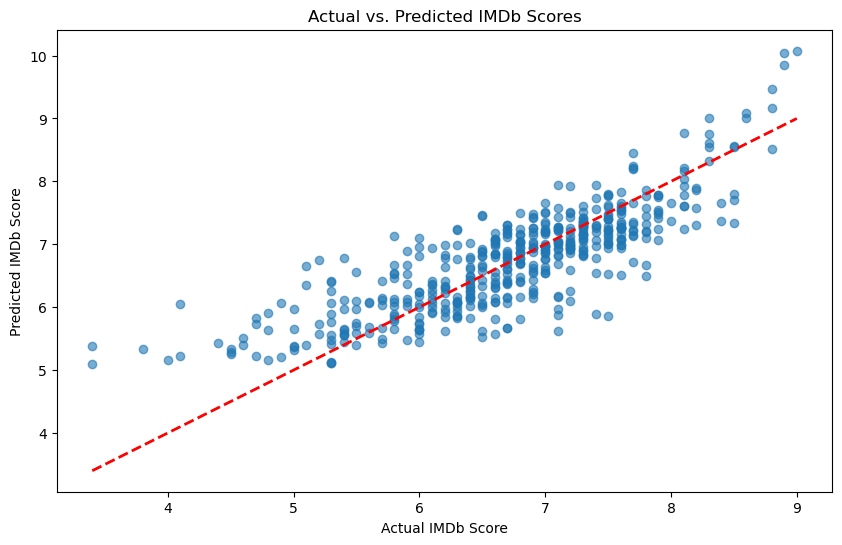

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import matplotlib.pyplot as plt

# Select the features and target variable
features = df[['Hidden Gem Score', 'Runtime', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Boxoffice', 'IMDb Votes']]
target = df['IMDb Score']

# Drop rows with missing values in features or target
features = features.dropna()
target = target[features.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Scatter plot of actual vs. predicted IMDb scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual vs. Predicted IMDb Scores')
plt.show()

In [12]:
# from sklearn.tree import plot_tree
# import dtreeviz

# # Set the size of the plot
# plt.figure(figsize=(20, 10))

# # Plot the decision tree with a maximum depth of 3
# # Visualize the decision tree with dtreeviz
# viz = dtreeviz.model(tree_model, X_train, y_train,
#                target_name='IMDb Score',
#                feature_names=features.columns)

# # Display the visualization
# viz.view()
# plt.show()